In [ ]:
# 任意位置横盘测试
import horizontal_area as ha
import high_low_xuejie_zuhui as hl
filename = '000001.SZ.csv'
df = hl.df_init(filename)
high_points, low_points = hl.find_high_low(df, filename, save_data=False, draw_n_days=400)
result = ha.find_horizontal_area(df, high_points, low_points, fft_percentile=100, min_len_of_window=3, ignore_hl=False)
ha.draw_horizontal_area(df, result, high_points, low_points, filename, n_days=200, print_result=False, show_plot=True, save_plot=False)

In [ ]:
# hl median测试
import horizontal_area as ha
import high_low_xuejie_zuhui as hl
filename = '000001.SZ.csv'
df = hl.df_init(filename)
high_points, low_points = hl.find_high_low(
    df, filename, save_data=False, draw=False)
result = ha.find_ha_near_hl_median(df, high_points, low_points, 0.03)
ha.draw_horizontal_area(df, result, high_points, low_points, filename,
                        n_days=270, print_result=False, show_plot=True, save_plot=False)


In [ ]:
# 对上方得到的data曲线进行DFT变换，得到频域上的信号
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd
import high_low_xuejie_zuhui as hl
filename = '000002.SZ.csv'
df = hl.df_init(filename)
data = df.tail(200)
data.plot(x='TRADE_DT', y='S_DQ_CLOSE', figsize=(20, 10))
# 对data进行DFT变换
data_fft = fft(data['S_DQ_CLOSE'].values)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(data_fft)
plt.show()
# 计算频谱中的总能量，并计算高频成分所占的比例。如果高频成分所占比例较小，那么曲线就比较平滑。
# 计算频谱中的总能量
energy = (data_fft * np.conj(data_fft)).real
# 计算高频成分所占的比例
high_freq_ratio = np.sum(energy[10:]) / np.sum(energy)
print(high_freq_ratio)
# 对高频成分进行滤波
data_fft_filtered = data_fft.copy()
data_fft_filtered[15:] = 0
# 对滤波后的数据进行逆变换
data_filtered = ifft(data_fft_filtered)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(data_filtered)
plt.show()

In [ ]:
# 对data曲线进行DFT变换，得到频域上的信号
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
import pandas as pd
import high_low_xuejie_zuhui as hl
filename = '000002.SZ.csv'
df = hl.df_init(filename)
data = df.tail(200)
# 将data等分为20份，对每份按照上述方法求的高频成分所占比例
n = 20
data_list = np.array_split(data, n)
high_freq_ratio_list = []
for temp_data in data_list:
    data_fft = fft(temp_data['S_DQ_CLOSE'].values)
    energy = (data_fft * np.conj(data_fft)).real
    high_freq_ratio = np.sum(energy[3:]) / np.sum(energy)
    high_freq_ratio_list.append(high_freq_ratio)
# 可视化
plt.figure(figsize=(20, 10))
plt.plot(high_freq_ratio_list)
plt.show()
print(high_freq_ratio_list)
# 使用plt.axvspan将高频成分占比可视化到data曲线上，高频占比越高的区域颜色越深
plt.figure(figsize=(20, 10))
plt.plot(data['S_DQ_CLOSE'].values)
for i in range(len(high_freq_ratio_list)):
    plt.axvspan(i * 10, (i + 1) * 10, facecolor='r',
                alpha=high_freq_ratio_list[i] * 100)

In [ ]:
heal = 0
baoji = 0.51+0.32
baoshang = 0.61
loss = 0.9
a = round(567+0.8*(4655+2394*(1+heal))+(567+0.8*(4655+2394*(1+heal)))*baoji*(baoshang))
final = round(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal))+(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal)))*baoji*(baoshang))
print(a, final)

In [ ]:
heal = 0
baoji = 0.51
baoshang = 0.61+0.64
loss = 0.9
a = round(567+0.8*(4655+2394*(1+heal))+(567+0.8*(4655+2394*(1+heal)))*baoji*(baoshang))
final = round(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal))+(540+0.8*(4655+2394*(1+heal))+0.8*loss*(4655+2394*(1+heal)))*baoji*(baoshang))
print(a, final)

In [ ]:
100*1.1

   start_date   end_date  type
0  2003-08-07 2003-11-18   2.0
1  2008-01-11 2008-03-14   2.0
2  2008-01-11 2008-04-21   3.0
3  2008-02-19 2008-03-14   1.0
4  2008-04-30 2008-06-19   1.0
5  2008-08-01 2008-09-17   2.0
6  2008-08-01 2008-10-10   3.0
7  2008-08-21 2008-09-17   1.0
8  2008-10-20 2008-11-04   1.0
9  2009-07-30 2009-08-31   1.0
10 2010-03-30 2010-09-29   2.0
11 2013-05-28 2013-07-08   1.0
12 2015-07-10 2015-08-25   2.0
13 2022-06-30 2022-10-31   2.0


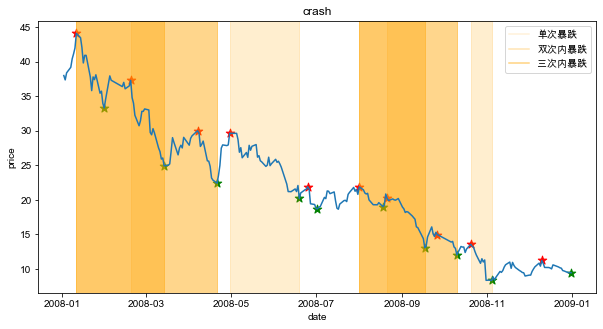

In [1]:
import high_low_xuejie_zuhui as hl
from crash import *
df = hl.df_init('000001.SZ.csv')
result = crash(df, threshold=0.3)
print(result)
draw_crash(df, result, '2008-01', '2009-01-01')